# Exploratory Data Analysis on Health Tech Data

**Data Preprocessing:**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
import HealthData

In [ ]:
healthdata = pd.read_excel("/content/HealthData.xlsx")

In [ ]:
healthdata.columns

Index(['Currently employed at least part-time',
       'Identify as having a mental illness', 'Education',
       'Owns a computer separate from a smart phone',
       'Hospitalized before for my mental illness',
       'How many days were you hospitalized for your mental illness',
       'I am legally disabled', 'Regularly access the internet',
       'I live with my parents', 'I have a gap in my resume',
       'Total resume gap in months',
       'Annual income (including any social welfare programs) in USD',
       'I am unemployed', 'I read outside of work and school',
       'Annual income from social welfare programs', 'I receive food stamps',
       'I am on section 8 housing',
       'Times you were hospitalized for your mental illness',
       'Lack of concentration', 'Anxiety', 'Depression', 'Obsessive thinking',
       'Mood swings', 'Panic attacks', 'Compulsive behavior', 'Tiredness',
       'Age', 'Gender', 'Household Income', 'Region', 'Device Type'],
      dtype='object

In [ ]:
healthdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 31 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Currently employed at least part-time                         334 non-null    int64  
 1   Identify as having a mental illness                           334 non-null    int64  
 2   Education                                                     334 non-null    object 
 3   Owns a computer separate from a smart phone                   334 non-null    int64  
 4   Hospitalized before for my mental illness                     334 non-null    int64  
 5   How many days were you hospitalized for your mental illness   297 non-null    float64
 6   I am legally disabled                                         334 non-null    int64  
 7   Regularly access the internet                                 334 non-n

In [ ]:
healthdata.isnull().sum()

Currently employed at least part-time                            0
Identify as having a mental illness                              0
Education                                                        0
Owns a computer separate from a smart phone                      0
Hospitalized before for my mental illness                        0
How many days were you hospitalized for your mental illness     37
I am legally disabled                                            0
Regularly access the internet                                    0
I live with my parents                                           0
I have a gap in my resume                                        0
Total resume gap in months                                       0
Annual income (including any social welfare programs) in USD     0
I am unemployed                                                  0
I read outside of work and school                                0
Annual income from social welfare programs                    

In [ ]:
healthdata['Region'].fillna(method='ffill', inplace=True)

In [ ]:
cols_to_impute = ['How many days were you hospitalized for your mental illness', 'Lack of concentration', 'Obsessive thinking','Mood swings','Panic attacks','Compulsive behavior','Tiredness']


In [ ]:
si = SimpleImputer()
healthdata[cols_to_impute] = si.fit_transform(healthdata[cols_to_impute])

Here, we make a function on the education column for changing the character into numerical and apply:

In [ ]:
healthdata['Education'] = healthdata['Education'].apply(HealthData.encode_education)

Similary apply in Age column:



In [ ]:
healthdata['Age'] = healthdata['Age'].apply(HealthData.encode_age)

Similary apply in gender column:



In [ ]:
healthdata['Gender'] = healthdata['Gender'].apply(HealthData.encoder_gender)


Similary apply in household income column:



In [ ]:
healthdata['Household Income'] = healthdata['Household Income'].apply(HealthData.encoder_income)

In [ ]:
healthdata.drop(['Device Type'], axis=1, inplace = True)

In [ ]:
encoder = OneHotEncoder(drop = 'first', sparse=False)
encoder_dummies = encoder.fit_transform(healthdata[['Region']])
healthdata.drop(columns=['Region'],inplace=True)
healthdata = pd.concat([healthdata, pd.DataFrame(encoder_dummies)],axis=1)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Performing EDA:

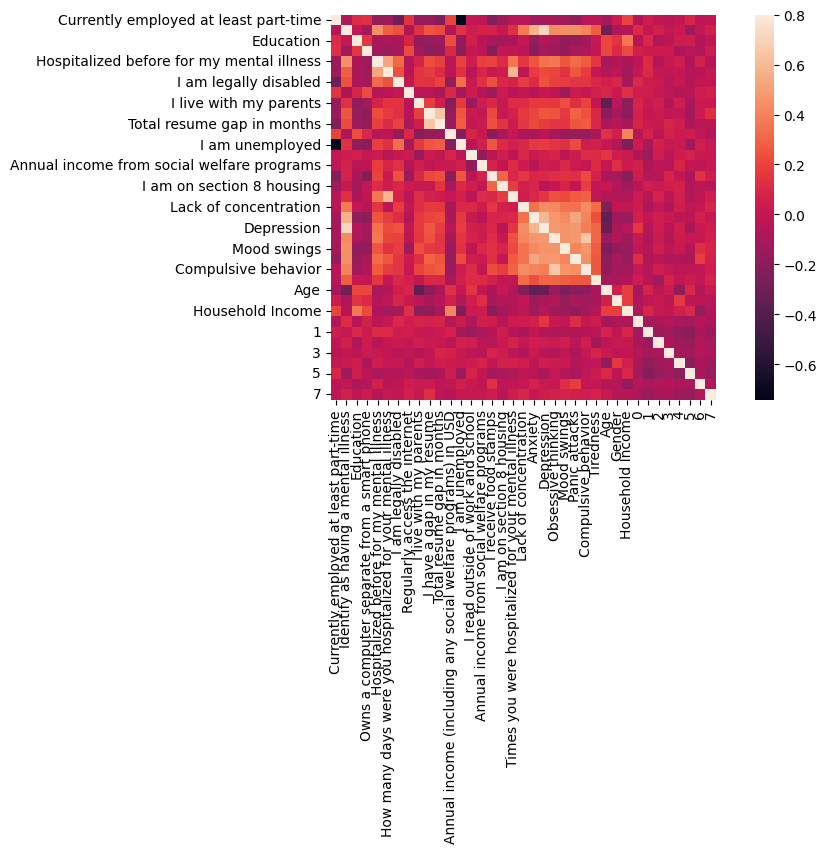

In [ ]:
corrmat = healthdata.corr()
f, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()


In [ ]:
healthdata.corr()

,Currently employed at least part-time,Identify as having a mental illness,Education,Owns a computer separate from a smart phone,Hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,Regularly access the internet,I live with my parents,I have a gap in my resume,...,Gender,Household Income,0,1,2,3,4,5,6,7
Currently employed at least part-time,1.000000,-0.065718,0.112310,0.126657,-0.159753,-0.126788,-0.310250,0.143274,-0.166550,-0.145068,...,0.033630,0.192619,-0.052999,0.038554,-0.016318,-0.033636,-0.004906,0.085004,-0.027712,-0.016318
Identify as having a mental illness,-0.065718,1.000000,0.002256,-0.125679,0.439156,0.279744,0.237348,-0.080127,0.137187,0.250350,...,-0.068066,-0.052173,0.104462,0.006476,0.055661,-0.000865,0.019991,-0.127135,-0.004127,0.055661
Education,0.112310,0.002256,1.000000,0.150311,-0.083852,-0.086051,-0.081743,0.079449,-0.178806,-0.159156,...,0.142982,0.364906,-0.055623,0.090611,-0.068931,-0.023799,0.041045,0.043774,-0.077874,-0.016902
Owns a computer separate from a smart phone,0.126657,-0.125679,0.150311,1.000000,-0.125730,-0.138751,-0.116516,0.217900,-0.125075,-0.182295,...,0.106134,0.219294,0.054159,0.028027,0.031415,0.023835,-0.084258,-0.024879,-0.063742,0.031415
Hospitalized before for my mental illness,-0.159753,0.439156,-0.083852,-0.125730,1.000000,0.528643,0.315741,-0.063998,0.075473,0.223729,...,-0.051465,-0.079095,-0.023111,0.105830,-0.056609,0.016816,0.046019,-0.082957,0.057086,-0.056609
How many days were you hospitalized for your mental illness,-0.126788,0.279744,-0.086051,-0.138751,0.528643,1.000000,0.238004,-0.042296,0.139604,0.169409,...,-0.012968,-0.122130,0.002677,0.107075,0.007091,-0.011358,0.002653,-0.058869,-0.035608,0.000337
I am legally disabled,-0.310250,0.237348,-0.081743,-0.116516,0.315741,0.238004,1.000000,0.010008,0.138883,0.137505,...,0.088208,-0.108455,0.091955,0.036492,0.028578,-0.044430,0.013250,-0.057055,-0.014756,-0.005512
Regularly access the internet,0.143274,-0.080127,0.079449,0.217900,-0.063998,-0.042296,0.010008,1.000000,-0.034376,-0.039393,...,0.021802,0.128203,0.047412,0.044810,0.008182,-0.016271,-0.062895,-0.030287,0.038849,0.062840
I live with my parents,-0.166550,0.137187,-0.178806,-0.125075,0.075473,0.139604,0.138883,-0.034376,1.000000,0.175459,...,-0.028717,-0.191237,0.078054,0.017385,0.047161,-0.052125,0.052711,-0.097027,0.027615,0.014750
I have a gap in my resume,-0.145068,0.250350,-0.159156,-0.182295,0.223729,0.169409,0.137505,-0.039393,0.175459,1.000000,...,-0.094613,-0.174999,0.070138,0.000111,0.027032,-0.004462,-0.005923,-0.114998,0.029076,0.121573


***Let’s Discuss some questions answer:***
1. 		Identify having a mental illness in men and women.
2. 		Identify whose mental health is worse men and women.
3. 		How many men and women read books outside of school or at work?
4. 		Identify how many men and women are currently employed at least part-time.
5. 		How many people have problems with concentration? (men/women)
6. 		How many people live with their parents? (men/women)
7. 		How many people have been hospitalized because of their mental health?
8. 		Mention the household income of people.
9. 		How many men and women have problems with anxiety and depression?
10. 		Identify the age distribution of mental health. In what age group do mental health problems occur the most?
11. 		Identify how many people are well-educated.

Let’s work it-

1. Identify having a mental illness in men and women.


Text(0.5, 1.0, 'People who identify themselves as having mental illness, Male:1 & Female:0')

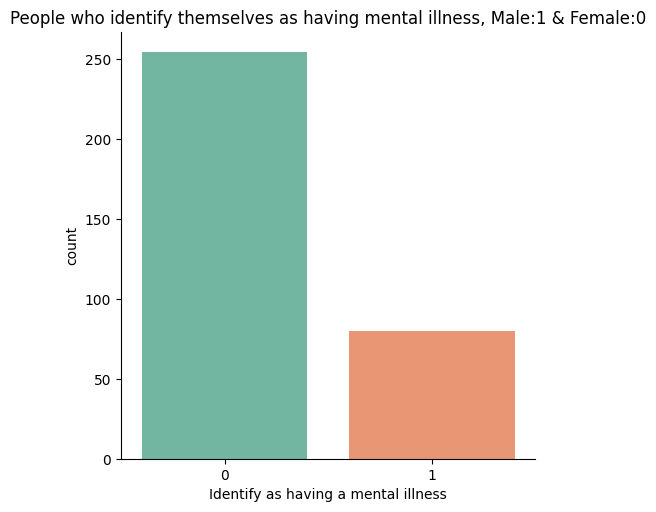

In [ ]:
sns.catplot(data=healthdata, x='Identify as having a mental illness',kind='count',palette = "Set2");
plt.title("People who identify themselves as having mental illness, Male:1 & Female:0")

As we can clearly see, the number of data points within females is higher than male.This means that having a mental illness is less likely in male.



2. Identity whose mental health is worse men and women?



Text(0.5, 1.0, ' Gender Count: Male:1 & Female:0')

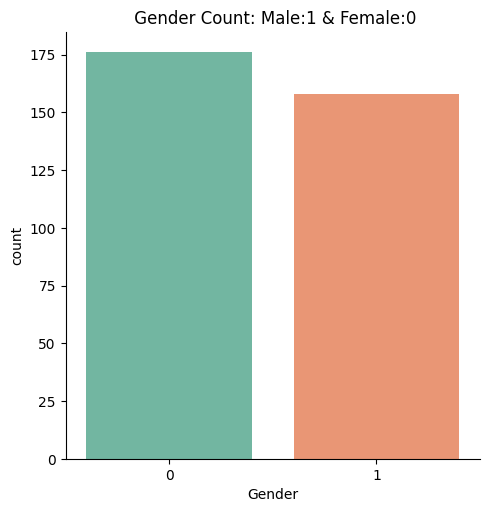

In [ ]:
sns.catplot(data=healthdata, x="Gender", kind="count", palette = "Set2");
plt.title(" Gender Count: Male:1 & Female:0")

Here, we see that females’ count is more in comparison to males.



3. How many men and women read books outside of school or at work?



Text(0.5, 1.0, ' I read outside of work and school: Male:1 & Female:0')

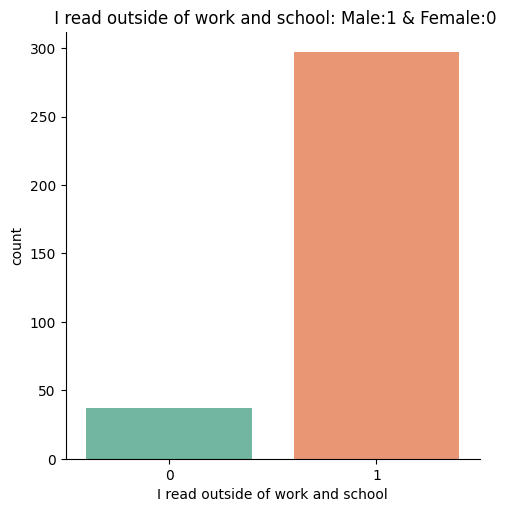

In [ ]:
sns.catplot(data=healthdata, x="I read outside of work and school", kind="count",palette = "Set2");
plt.title(" I read outside of work and school: Male:1 & Female:0")

Most men read outside work and school.



4. Identify how many men and women are currently employed at least part-time.

Text(0.5, 1.0, 'Currently employed part time for Male:1 & Female:0')

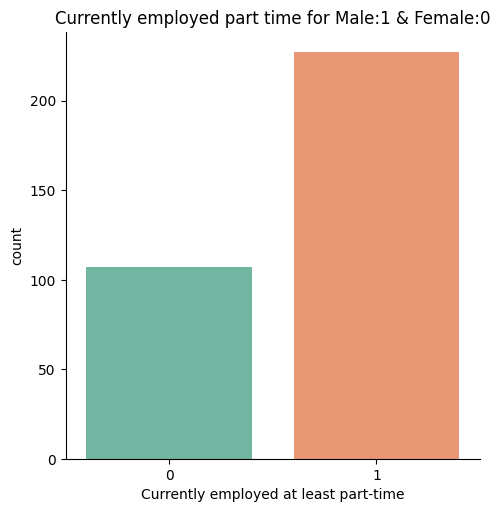

In [ ]:
sns.catplot(data=healthdata, x="Currently employed at least part-time", kind="count",palette = "Set2");
plt.title("Currently employed part time for Male:1 & Female:0")

Most of the men are currently employed at least part-time.



5. How many people have a problem with concentration? (men/women)



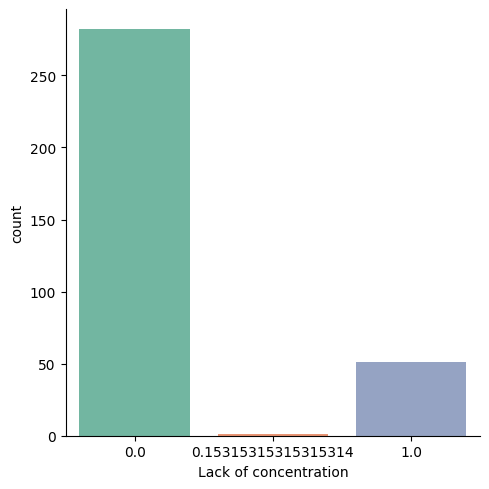

In [ ]:
sns.catplot(data=healthdata,x="Lack of concentration",kind="count",palette = "Set2");

6. How many people live with their parents? (men/women)



Text(0.5, 1.0, 'I live with my parents Male:1 & Female:0')

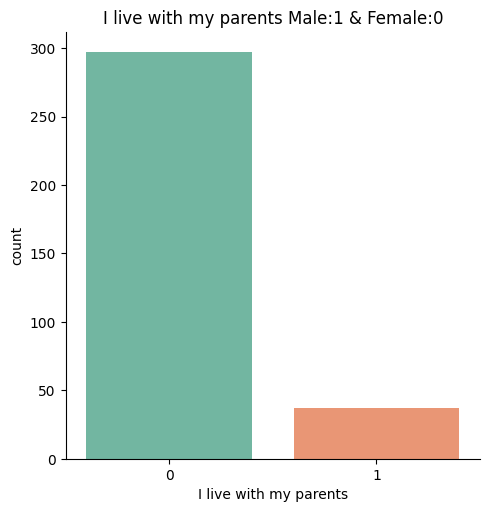

In [ ]:
sns.catplot(data=healthdata, x="I live with my parents", kind="count",palette = "Set2");
plt.title("I live with my parents Male:1 & Female:0")

7. How many people have been hospitalized because of their mental health?



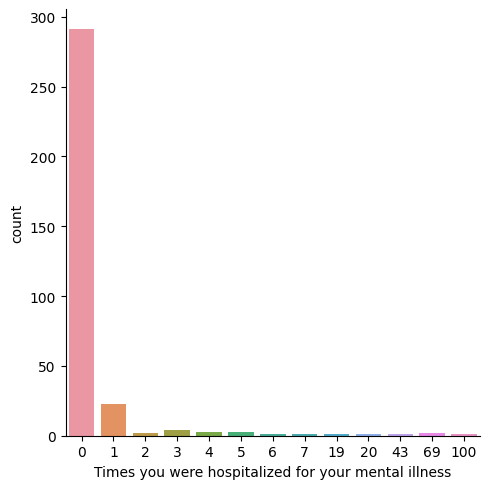

In [ ]:
sns.catplot(data=healthdata, x="Times you were hospitalized for your mental illness", kind="count");


8. Mention the household income of people.



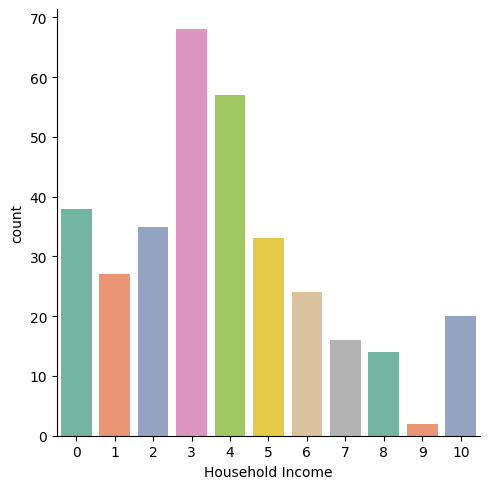

In [ ]:
sns.catplot(data=healthdata, x="Household Income", kind="count",palette = "Set2");


The more number people household income is between ‘$25,000-$49,999’ and then ‘$50,000-$74,999'. The number of people with household income is between ‘175,000-$199,999’. Now, this makes it clear fewer people have high salaries.

9. How many men and women have problem with anxiety and depression?



Text(0.5, 1.0, ' In this Anxiety vs Depression graph, 1 is Male gender & 0 is female gender')

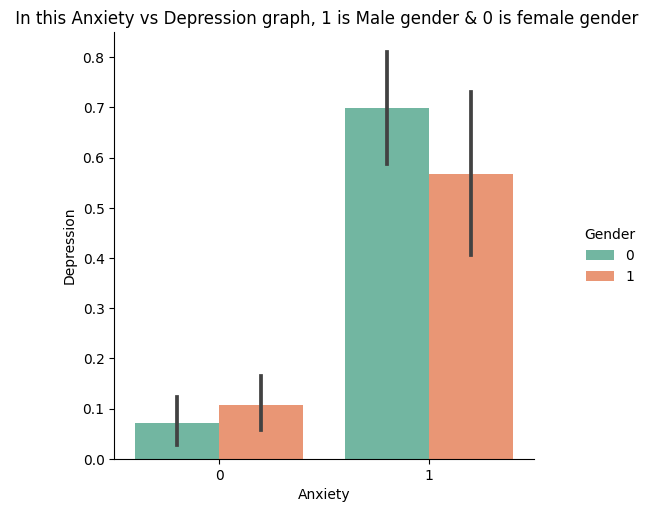

In [ ]:
sns.catplot(data=healthdata, x="Anxiety", y="Depression", hue="Gender", kind="bar",palette = "Set2")
plt.title(" In this Anxiety vs Depression graph, 1 is Male gender & 0 is female gender")

Here, we see from the above graph male is more anxiety and depression than females.

10. Identify the age distribution of mental health. In what age group do mental health problems occur the most



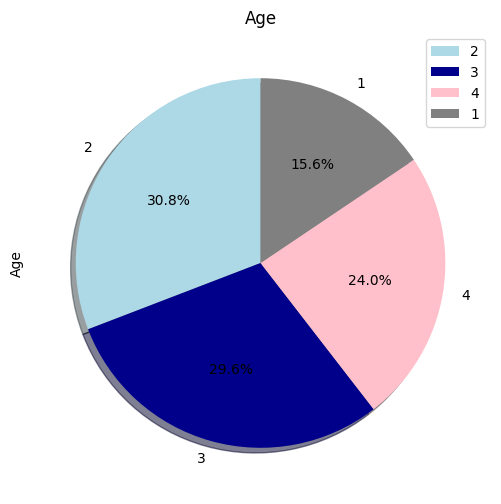

In [ ]:
color = ['lightblue', 'darkblue', 'pink', 'grey']
healthdata['Age'].value_counts().plot(kind='pie',colors = color,
                              figsize=(8,6),
                              autopct='%1.1f%%',
                              shadow = True,
                              startangle=90)
plt.title("Age")
plt.legend()
plt.show()


It is clear from the pie chart that people who were in the age group of 30–44 had more mental health problems about 30.8%. The age between 45–60 is 29.6%.



11. Identify how many people are well-educated.



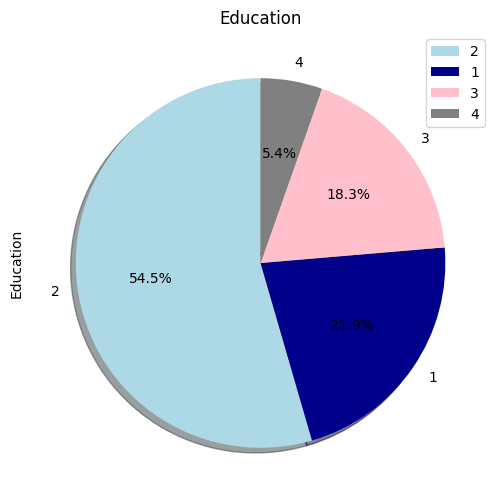

In [ ]:
color = ['lightblue', 'darkblue', 'pink', 'grey']
healthdata['Education'].value_counts().plot(kind='pie',colors = color,
                                    figsize=(8,6),
                                    autopct='%1.1f%%',
                                    shadow = True,
                                    startangle=90)
plt.title("Education")
plt.legend()
plt.show()


From the above pie its very clear that 54.5% of person is ‘Some Undergraduate or Complete graduate’ and 21.9% people is ‘Some high school/Highschool or GED’

Conclusion:
Visualization makes it very easy and clear to understand the data. And we understand very easily how many people have faced mental health illness out of which how many are male and female.

It is very clear that female has a lot of mental health issues because of responsibilities and household